# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* **Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,** 
* **Find the factors driving the lead conversion process**
* **Create a profile of the leads which are likely to convert**


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* **ID**: ID of the lead
* **age**: Age of the lead
* **current_occupation**: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* **first_interaction**: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* **profile_completed**: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* **website_visits**: How many times has a lead visited the website
* **time_spent_on_website**: Total time spent on the website
* **page_views_per_visit**: Average number of pages on the website viewed during the visits.
* **last_activity**: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* **print_media_type1**: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* **print_media_type2**: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* **digital_media**: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* **educational_channels**: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* **referral**: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* **status**: Flag indicating whether the lead was converted to a paid customer or not.

## Importing libraries and data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('ExtraaLearn.csv')
df = data.copy()

## Data Overview

- Observations
- Sanity checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

* There are 5 numeric features (age, website_visits, time_spent_on_website, page_views_per_visit, & status)
* The remaining 10 features are object
* There are 4612 entries or data points
* There are no null values. We'll check that values are correctly entered.

In [4]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [5]:
df.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


* Age is in whole numbers
* Current occupation appears to include Unemployed, Professional, and Student
* Status is labeled 0 for not converted and 1 for converted.

In [6]:
df.shape

(4612, 15)

In [7]:
#check if ID is unique to drop
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64


* Each ID is unique. Therefore is it NOT a predictive feature and can be removed. In addition, we do not wish to perform decision trees based on individual leads.
* Even though all ID's are unique, it is possible that two or more users can have the same data.
* No variables have only 1 unique value. All variables could potentially have predictive qualities.


In [8]:
# drop column 'ID' 
df = df.drop(columns = ['ID'], axis = 1)
df.head(1)


,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1


In [9]:
# Look at summary statistics:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,4612.0,NaN,NaN,NaN,46.201214,13.161454,18.0,36.0,51.0,57.0,63.0
current_occupation,4612,3,Professional,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_interaction,4612,2,Website,2542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_completed,4612,3,High,2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
website_visits,4612.0,NaN,NaN,NaN,3.566782,2.829134,0.0,2.0,3.0,5.0,30.0
time_spent_on_website,4612.0,NaN,NaN,NaN,724.011275,743.828683,0.0,148.75,376.0,1336.75,2537.0
page_views_per_visit,4612.0,NaN,NaN,NaN,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
last_activity,4612,3,Email Activity,2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type1,4612,2,No,4115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type2,4612,2,No,4379,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations
* Average age of leads is: **46.2** with range 18 to 63.

* The majority of leads have a first interaction with ExtraaLearn using the Website rather than Mobile</font>
* Most leads have high percentage (75 - 100%) completion of profile
* Average time spent on website is: **724**
* Average page views per visit is: **3.03**

* Last activity is more likely to be: **email activity**
* There are some values of **0** for website-related features (website_visits, time_spent_on_website, page_views_per_visit)
* While the max values for **time_spent_on_website** and **page_views_per_visit** appear to be extreme outliers compared to the mean, they are not impossible so may not constitute errors



#### Check labels
See if there are typos in data point labels

In [10]:
# Get a sense of the value names for the categorical features to make sure no typos/errors:
cat_feat = list(df.select_dtypes(include=['object']).columns)
print(cat_feat)


['current_occupation', 'first_interaction', 'profile_completed', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']


In [11]:
for x in cat_feat:
    y = pd.DataFrame(df[x].value_counts())
    print(y)
    print('-'*30)

                    count
current_occupation       
Professional         2616
Unemployed           1441
Student               555
------------------------------
                   count
first_interaction       
Website             2542
Mobile App          2070
------------------------------
                   count
profile_completed       
High                2264
Medium              2241
Low                  107
------------------------------
                  count
last_activity          
Email Activity     2278
Phone Activity     1234
Website Activity   1100
------------------------------
                   count
print_media_type1       
No                  4115
Yes                  497
------------------------------
                   count
print_media_type2       
No                  4379
Yes                  233
------------------------------
               count
digital_media       
No              4085
Yes              527
------------------------------
                      co

In [12]:
#confirming no null values
df.isnull().sum() 

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

* All category values appear to be labeled correctly. There do not appear to be any misspellings of values in object features and all counts are appropriately assigned. 
* We have confirmed there are no missing values

#### Duplication check
Curious to see if any entries are identical

In [13]:
# Curious to see if any leads were duplicated without ID column present
dup = df[df.duplicated(keep = False) == True]
dup.shape

(26, 14)

In [14]:
dup.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
33,56,Professional,Mobile App,Medium,0,0,0.0,Phone Activity,No,No,No,No,No,0
37,59,Professional,Website,High,0,0,0.0,Email Activity,No,No,No,No,No,1
400,59,Unemployed,Mobile App,High,0,0,0.0,Email Activity,No,No,No,No,No,0
451,58,Professional,Website,High,0,0,0.0,Phone Activity,No,No,No,No,No,1
463,32,Unemployed,Mobile App,High,0,0,0.0,Email Activity,No,No,No,No,No,0


* There are several leads (26) who have identical values with another lead.  This is not surprising as there are a limited number of categorical features with limited value options, and many numeric features with zeros.
* We will not delete duplicated rows as these are not likely to be anomalies.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how **current occupation** affects lead status.
2. The company's first impression on the customer must have an impact. Do the **first channels of interaction** have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Univariate Analysis:
### Categorical

In [15]:
import matplotlib.pyplot as plt

In [16]:
df.head(0)

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status


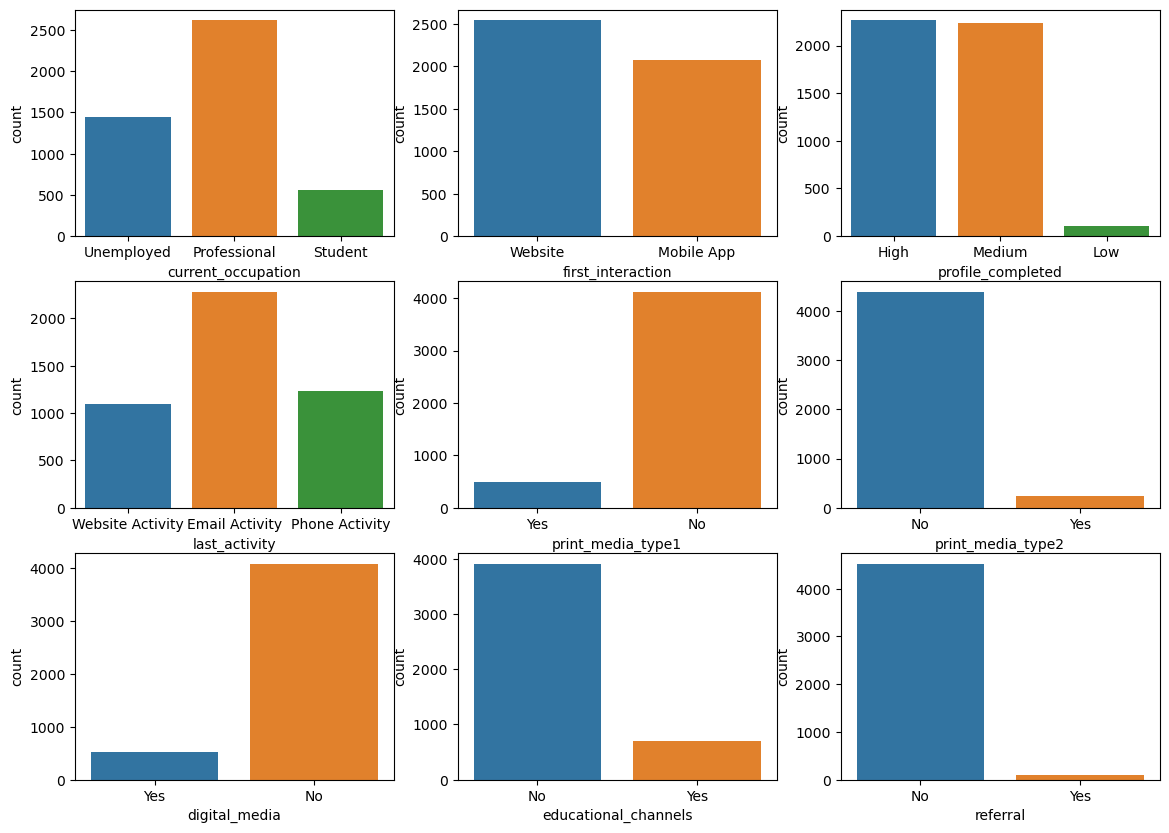

In [17]:
# view categorical features:
fig, ax = plt.subplots(3,3, figsize=(14,10));
sns.countplot(df, x = 'current_occupation', ax = ax[0,0])
sns.countplot(df, x = 'first_interaction', ax = ax[0,1])
sns.countplot(df, x = 'profile_completed', ax = ax[0,2])
sns.countplot(df, x = 'last_activity', ax = ax[1,0])
sns.countplot(df, x = 'print_media_type1', ax = ax[1,1])
sns.countplot(df, x = 'print_media_type2', ax = ax[1,2])
sns.countplot(df, x = 'digital_media', ax = ax[2,0])
sns.countplot(df, x = 'educational_channels', ax = ax[2,1])
sns.countplot(df, x = 'referral', ax = ax[2,2])
plt.show()


In [18]:
col_cat = list(df.select_dtypes(include = 'object').columns)
for col in col_cat:
    cat_count = df[col].value_counts(normalize = True)
    print(cat_count)
    print('-'*50)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
--------------------------------------------------
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
--------------------------------------------------
digital_media
No     0.885733
Yes    0.114267
Name: proportion, 

**Current Occupation**
* More than half of the leads are professional.

**First Interaction**
* First interaction is roughly evenly split between website and mobile app.

**Profile Completed**
* Almost all leads complete the profile at high or medium level, evenly split.

**Last activity**
* Half of **last activity** was email, with phone and website similarly split for the remaining.

**Print media type 1 (newspaper)**
* Only 10% saw newspaper ads 

**Print media type 2 (magazine)**
* Only 5% saw magazine ads 

**Digital media**
* Only about 10% saw ads on a digital platform

**Educational channels**
* Only 15% learned about ExtraaLearn through online forums, discussion threads, educational websites, etc.

**Referral**
* Only 2% of leads were referred.

### Numeric

In [19]:
num_feat = list(df.select_dtypes(include=['int64', 'float64']).columns)
num_feat

['age',
 'website_visits',
 'time_spent_on_website',
 'page_views_per_visit',
 'status']

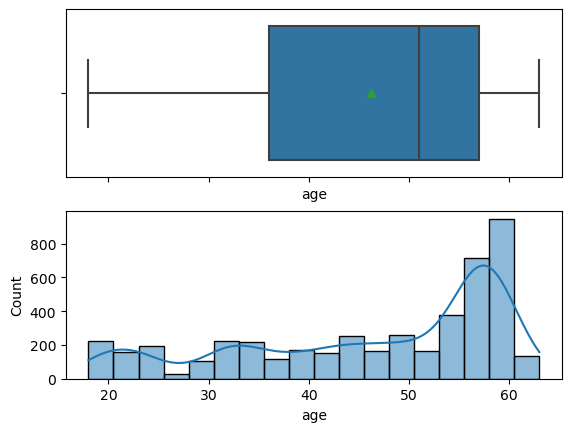

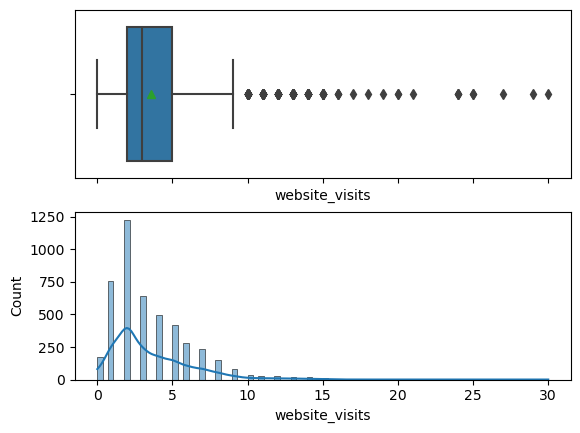

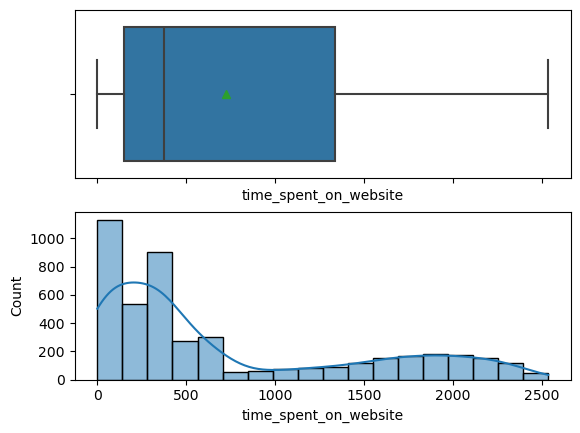

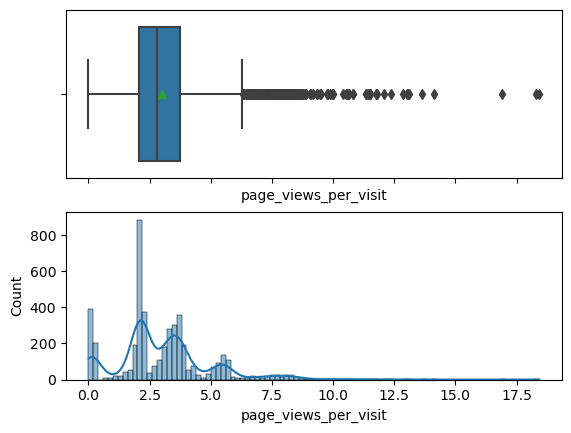

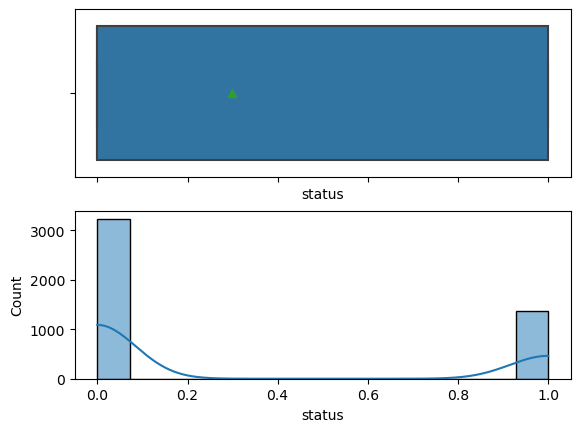

In [20]:
for col in num_feat:
    fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True)
    sns.boxplot(df, x = col, ax  = ax_box, showmeans = True)
    sns.histplot(df,x = col, ax = ax_hist, kde = True)

**Age**
* Age is shifted right or left skewed, with median higher than the mean (around 51) and mode around 60.
* There are no outliers per the barplot, as there are about 200 leads at the lowest ages (around 20) and about 100 at the highest ages (60+).
* Age could be an important variable for targeting converts.

**Website visits**
* There is a shift left (right skewed) with a mode of about 2-3 visits and median slightly to the right at about 3 visits.
* Outliers appear after about 9 visits with the highest around 30.

**Time spent on website**
* Time spent on website is also right skewed/shifted left, with a nearly bi-modal distribution at about 100 and 300. 
* There are no real outliers.

**Page views per visit**
* Page views has a multi-modal distribution.
* It is left-shifted/right-skewed with outliers after about 6 visits.
* A couple of extreme outliers exist at around 18 pages.

**Status**
* There are about half as many converts as non-converts. The distribution is imbalanced.

## Bivariate Analysis

#### Correlation Map

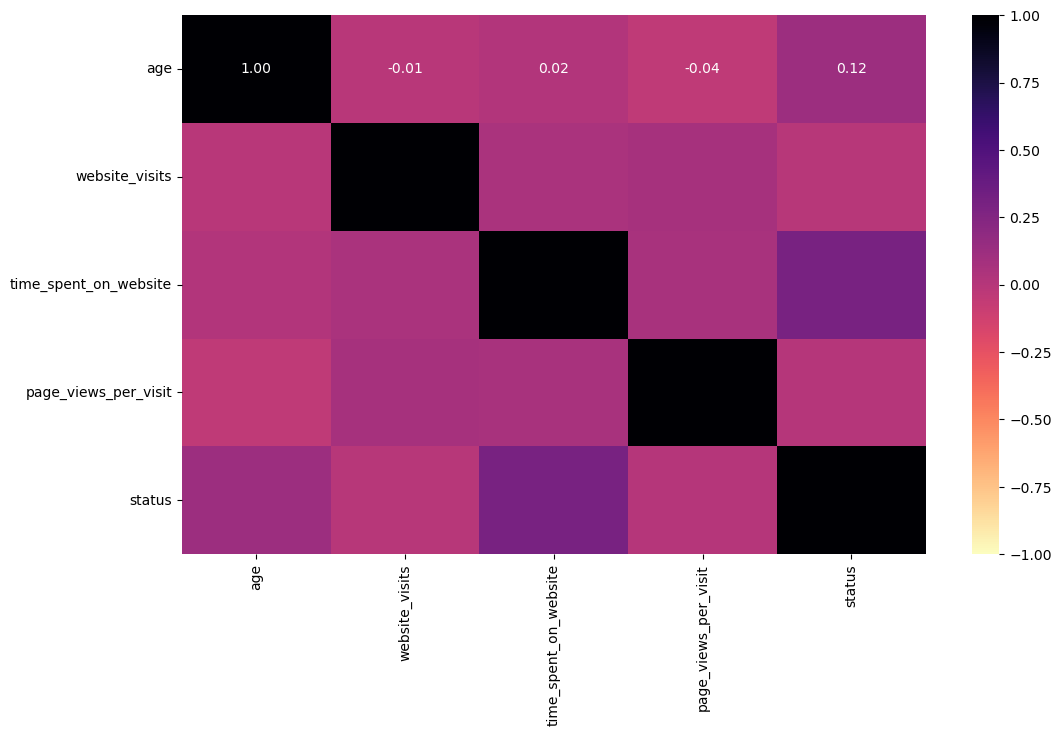

In [21]:
# Heatmap correlation 
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap = 'magma_r')
plt.show()

* **time spent on website** has a moderate positive correlation with **status**
* **age** has a weak positive correlation with **status**
* No other variables have a high correlation among them.

### Percentages of predictors with target

#### Current Occupation

status                     0         1
current_occupation                    
Professional        0.644878  0.355122
Student             0.882883  0.117117
Unemployed          0.734212  0.265788


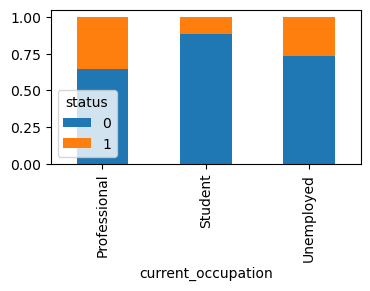

In [22]:
occ = pd.crosstab(df['current_occupation'], df['status'], normalize = 'index')
print(occ)
occ.plot(kind = 'bar', stacked=True, figsize = (4,2));

* There is a higher conversion rate (36%) of Professionals vs students or unemployed.
* The conversion rate ranking is similar to the count ranking of each occupation group (more professionals and less students)

#### Age

status            0         1
age_range                    
(18, 25]   0.889109  0.110891
(25, 35]   0.702422  0.297578
(35, 45]   0.681948  0.318052
(45, 55]   0.678019  0.321981
(55, 65]   0.663697  0.336303


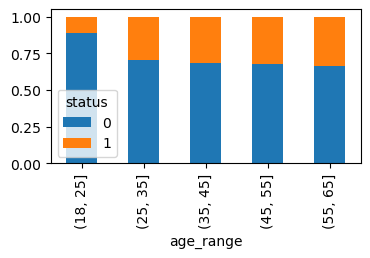

In [23]:
# view ages in bins
df_age_range = df.copy()
df_age_range['age_range'] = pd.cut(df['age'], bins = (18, 25,35,45,55,65,100))

age_ranges = pd.crosstab(df_age_range['age_range'], df_age_range['status'], normalize = 'index')
print(age_ranges)
age_ranges.plot(kind = 'bar', stacked=True, figsize = (4,2));

* 18- 25 year olds represented the lowest conversion rate at 11%
* Age may correspond to current_occupation = student, which similary had lowest conversion rate
* All other age groups had similar conversion rate around 30% each
* 55 - 65 year olds had the most at 33.6%
* The conversion rate increased slightly from age 25 to 65.
* Low conversion rate in 18-25 only, compared with even conversion in all other groups, could explain the slight positive correlation (.12) of age and status in the heat map. 

#### First Interaction

status                    0         1
first_interaction                    
Mobile App         0.894686  0.105314
Website            0.544060  0.455940


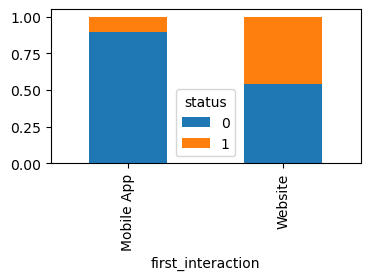

In [24]:
interaction = pd.crosstab(df['first_interaction'], df['status'], normalize = 'index')
print(interaction)
interaction.plot(kind = 'bar', stacked=True, figsize = (4,2));

* About half of leads first encountering ExtraaLearn on the website converted.
* There were very few conversions where MobileApp was first encounter (10.5%)
* Mobile app users could potentially relate to student users, who also had lower conversion rates

#### Were Mobile App users more likely to be students?

first_interaction   Mobile App   Website
current_occupation                      
Professional          0.455275  0.544725
Student               0.427027  0.572973
Unemployed            0.445524  0.554476


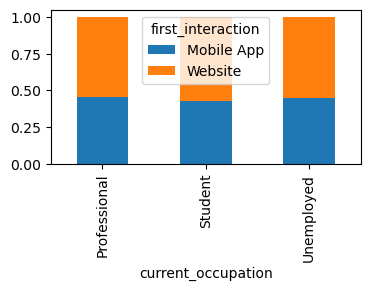

In [25]:
app_users = pd.crosstab(df['current_occupation'], df['first_interaction'], normalize = 'index')
print(app_users)
app_users.plot(kind = 'bar', stacked=True, figsize = (4,2));

* An examination of occupation and first interaction shows that app users were fairly uniform across occupation groups.
* Students did not represent a greater percentage of app users.

#### Profile Completed

status                    0         1
profile_completed                    
High               0.582155  0.417845
Low                0.925234  0.074766
Medium             0.811245  0.188755


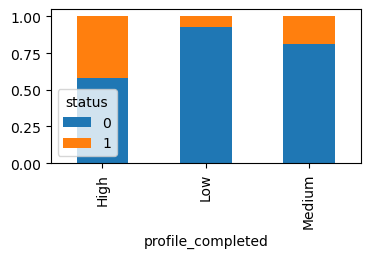

In [26]:
profile = pd.crosstab(df['profile_completed'], df['status'], normalize = 'index')
print(profile)
profile.plot(kind = 'bar', stacked=True, figsize = (4,2));

* Leads with High profile completion were more likely to convert than other groups.
* Low profile completion resulted in only 7% conversion rate

#### Website Visits

status            0         1
visit_bin                    
(0, 5]     0.694154  0.305846
(5, 10]    0.712999  0.287001
(10, 15]   0.660194  0.339806
(15, 20]   0.750000  0.250000
(20, 25]   0.666667  0.333333
(25, 30]   1.000000  0.000000


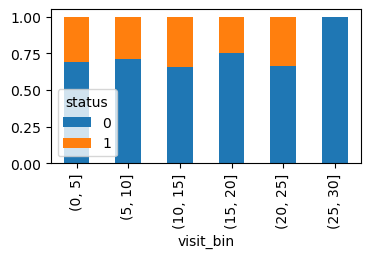

In [27]:
# binning website visits
df_visits = df.copy()
df_visits['visit_bin'] = pd.cut(df['website_visits'], bins = (0,5,10,15,20,25,30))

web_visits = pd.crosstab(df_visits['visit_bin'], df_visits['status'], normalize = 'index')
print(web_visits)
web_visits.plot(kind = 'bar', stacked=True, figsize = (4,2));

* Fairly uniform conversion rate across number of website visits confirms near 0 correlation in heatmap

#### Last Activity

status                   0         1
last_activity                       
Email Activity    0.696664  0.303336
Phone Activity    0.786872  0.213128
Website Activity  0.615455  0.384545


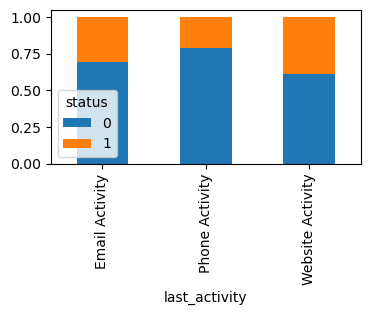

In [28]:
activity = pd.crosstab(df['last_activity'], df['status'], normalize = 'index')
print(activity)
activity.plot(kind = 'bar', stacked=True, figsize = (4,2));

* Last activity websity had higher conversion rate than email or phone, although the range is 21 to 38.
* It does not appear that there is a statistical difference in conversion rate between last activities

#### Ads

status                   0        1
print_media_type1                  
No                 0.70401  0.29599
Yes                0.68008  0.31992


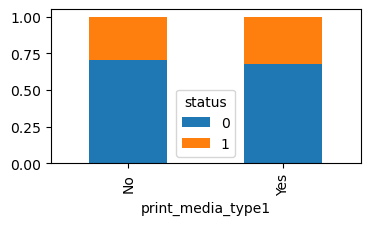

In [29]:
#newspaper ads
newspaper = pd.crosstab(df['print_media_type1'], df['status'], normalize = 'index')
print(newspaper)
newspaper.plot(kind = 'bar', stacked=True, figsize = (4,2));

status                    0         1
print_media_type2                    
No                 0.702672  0.297328
Yes                0.678112  0.321888


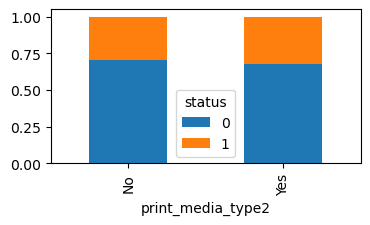

In [30]:
#magazine ads
magazine = pd.crosstab(df['print_media_type2'], df['status'], normalize = 'index')
print(magazine)
magazine.plot(kind = 'bar', stacked=True, figsize = (4,2));

status                0         1
digital_media                    
No             0.704039  0.295961
Yes            0.681214  0.318786


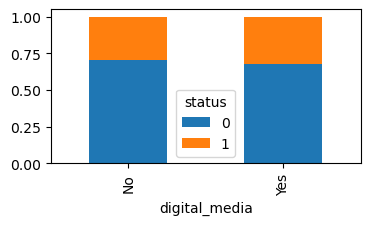

In [31]:
#digital media
digital = pd.crosstab(df['digital_media'], df['status'], normalize = 'index')
print(digital)
digital.plot(kind = 'bar', stacked=True, figsize = (4,2));

status                       0         1
educational_channels                    
No                    0.697978  0.302022
Yes                   0.720567  0.279433


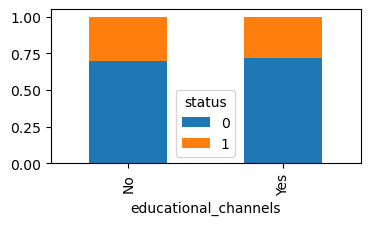

In [32]:
#educational channels
ed_channels = pd.crosstab(df['educational_channels'], df['status'], normalize = 'index')
print(ed_channels)
ed_channels.plot(kind = 'bar', stacked=True, figsize = (4,2));

* Various ads and exposure on educational channels do not appear to significantly affect conversion rates

#### Does occupation affect ad type?

educational_channels        No       Yes
current_occupation                      
Professional          0.842508  0.157492
Student               0.848649  0.151351
Unemployed            0.854962  0.145038
--------------------------------------------------
print_media_type1         No       Yes
current_occupation                    
Professional        0.890673  0.109327
Student             0.879279  0.120721
Unemployed          0.900069  0.099931
--------------------------------------------------
print_media_type2         No       Yes
current_occupation                    
Professional        0.945336  0.054664
Student             0.954955  0.045045
Unemployed          0.954892  0.045108
--------------------------------------------------
digital_media             No       Yes
current_occupation                    
Professional        0.879205  0.120795
Student             0.895495  0.104505
Unemployed          0.893824  0.106176
--------------------------------------------------


Text(0.5, 1.0, 'Digital Media by Occupation')

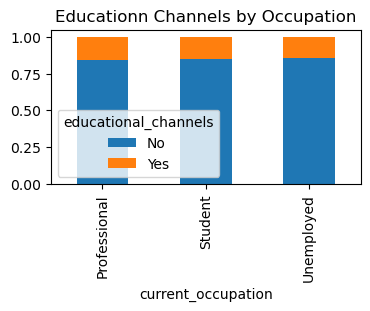

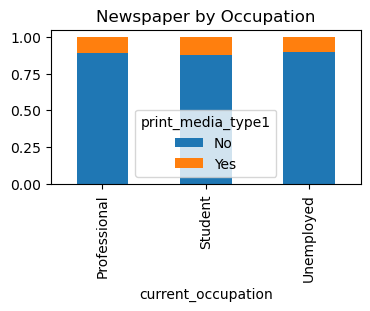

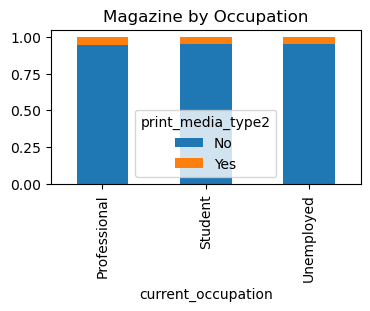

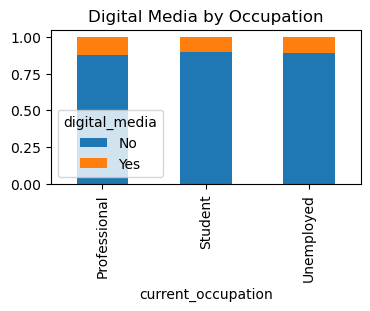

In [33]:
#occupation by education channels
occ_ed = pd.crosstab(df['current_occupation'], df['educational_channels'], normalize = 'index')
print(occ_ed)
print("-"*50)
occ_ed.plot(kind = 'bar', stacked=True, figsize = (4,2));
plt.title("Educationn Channels by Occupation")

occ_news = pd.crosstab(df['current_occupation'], df['print_media_type1'], normalize = 'index')
print(occ_news)
print("-"*50)
occ_news.plot(kind = 'bar', stacked=True, figsize = (4,2));
plt.title("Newspaper by Occupation")

occ_mag = pd.crosstab(df['current_occupation'], df['print_media_type2'], normalize = 'index')
print(occ_mag)
print("-"*50)
occ_mag.plot(kind = 'bar', stacked=True, figsize = (4,2));
plt.title("Magazine by Occupation")

occ_dig = pd.crosstab(df['current_occupation'], df['digital_media'], normalize = 'index')
print(occ_dig)
print("-"*50)
occ_dig.plot(kind = 'bar', stacked=True, figsize = (4,2));
plt.title("Digital Media by Occupation")

* Students were slightly more likely to view the ad in a newspaper.
* ExtraaLearn might consider keeping or adding exposure to student- and campus-based newspapers.
* There was practically no difference in occupation and online forums, discussion threads, etc.
* Professionals may be more likely to view the ad in a magazine, although the difference is not signicant (5.5% vs 4.5%)
* ExtraaLearn might use industry magazines to target professionals.
* Professionals were more likely to view an ad in digital media (12% vs 10%). 
* It is not clear which digital platforms are addressed using this dataset.
* Overall, there is not much distinction between occupation type and ad type.


#### Referral

status           0         1
referral                    
No        0.709228  0.290772
Yes       0.322581  0.677419


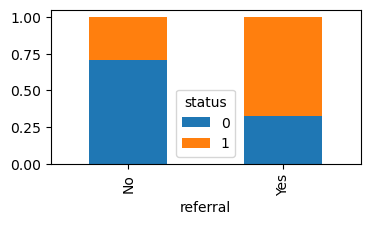

In [34]:
ref = pd.crosstab(df['referral'], df['status'], normalize = 'index')
print(ref)
ref.plot(kind = 'bar', stacked=True, figsize = (4,2));

* A greater proportion of leads that were referred tended to convert, versus those that were not referred.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

#### Feature Engineering
* As there were no null values, no imputing of numerical fillers were required
* As there were no typos in categorical values, there was no need to correct any labels or values in the dataset

## Building a Decision Tree model

In [35]:
#convert categorical to numeric using one-hot encoding (ohe)
df_ohe = pd.get_dummies(df, drop_first = True).copy()
df_ohe.head(1)

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.861,1,False,True,True,False,False,False,True,True,False,True,False,False


In [36]:
df_ohe.info() #view ohe output

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4612 non-null   int64  
 1   website_visits                  4612 non-null   int64  
 2   time_spent_on_website           4612 non-null   int64  
 3   page_views_per_visit            4612 non-null   float64
 4   status                          4612 non-null   int64  
 5   current_occupation_Student      4612 non-null   bool   
 6   current_occupation_Unemployed   4612 non-null   bool   
 7   first_interaction_Website       4612 non-null   bool   
 8   profile_completed_Low           4612 non-null   bool   
 9   profile_completed_Medium        4612 non-null   bool   
 10  last_activity_Phone Activity    4612 non-null   bool   
 11  last_activity_Website Activity  4612 non-null   bool   
 12  print_media_type1_Yes           46

In [37]:
#import libraries for decision tree modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier #a Classifier for binary/categorical targets

#model performance libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [38]:
#predictors: all columns except target variable:
x = df_ohe.drop('status', axis = 1)
x.head(1)

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.861,False,True,True,False,False,False,True,True,False,True,False,False


In [39]:
#target variable
y = df_ohe['status']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: status, dtype: int64

#### Test-train Split
There were about 2x as many non-converts as converts. This demonstrated a slight imbalance in the target classes.
We will use a 70-30 split and stratify to maintain the same percentage of samples of each target class.

In [40]:
#split data on 30% test size
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 1, stratify = y)

In [41]:
x_train.shape, x_test.shape #view split

((3228, 16), (1384, 16))

In [42]:
# function for metrics table
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [43]:
# function for metrics table and confusion matrix
def metrics_table(y_actual, y_predicted, class_labels):  #pass y_train, .predict predictions, and .classes_
    print(classification_report(y_actual, y_predicted))
          
    cm = confusion_matrix(y_actual, y_predicted, labels = class_labels)
    plt.figure(figsize=(4,4))
    cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_labels)
    cm_disp.plot()     
    plt.show()

In [44]:
#run the decision tree model
dt_classifier = DecisionTreeClassifier(random_state = 1)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



<Figure size 400x400 with 0 Axes>

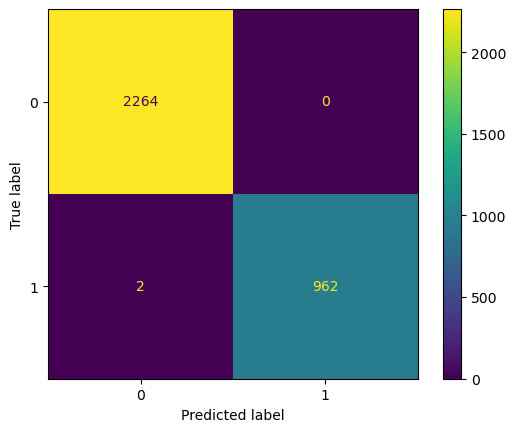

In [45]:
# view metrics on training set
dt_classifier_perf_train = dt_classifier.predict(x_train)
metrics_table(y_train, dt_classifier_perf_train, dt_classifier.classes_)

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       971
           1       0.68      0.67      0.68       413

    accuracy                           0.81      1384
   macro avg       0.77      0.77      0.77      1384
weighted avg       0.81      0.81      0.81      1384



<Figure size 400x400 with 0 Axes>

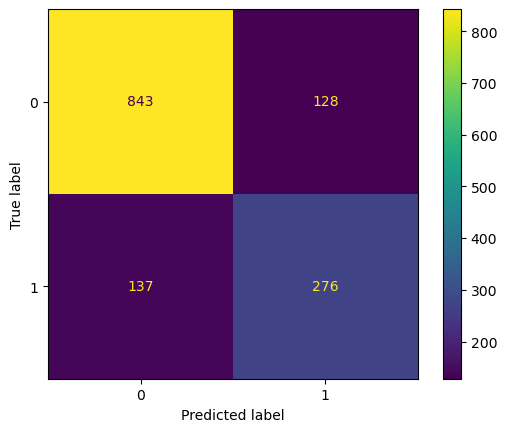

In [46]:
# view metrics on test set
dt_classifier_perf_test = dt_classifier.predict(x_test)
metrics_table(y_test, dt_classifier_perf_test, dt_classifier.classes_)

* The training set had nearly perfect prediction.
* The test set was less better at identifying convert = True.
* This means there is some overfitting so we will tune hyperparameters to attempt better metrics for the test dataset
* First we'll get insight as to the features the DT model considered most important, beginning with the root node up to depth = 3:

### View tree

In [47]:
# View factor importance with cut tree
from sklearn import tree
features = list(x.columns) #names of predictors
features

['age',
 'website_visits',
 'time_spent_on_website',
 'page_views_per_visit',
 'current_occupation_Student',
 'current_occupation_Unemployed',
 'first_interaction_Website',
 'profile_completed_Low',
 'profile_completed_Medium',
 'last_activity_Phone Activity',
 'last_activity_Website Activity',
 'print_media_type1_Yes',
 'print_media_type2_Yes',
 'digital_media_Yes',
 'educational_channels_Yes',
 'referral_Yes']

In [48]:
# Training a shallower tree for visualization. Max_depth = 3
dt_classifier_depth3 = DecisionTreeClassifier(random_state = 1, max_depth = 3) # for manageable depth
dt_classifier_depth3.fit(x_train, y_train) 


DecisionTreeClassifier(max_depth=3, random_state=1)

In [49]:
# only to see metrics of depth = 3
# dt_classifier_perf_train3 = dt_classifier_depth3.predict(x_train)
# metrics_table(y_train, dt_classifier_perf_train3, dt_classifier.classes_) #only to see metrics of tree visualized at d = 3

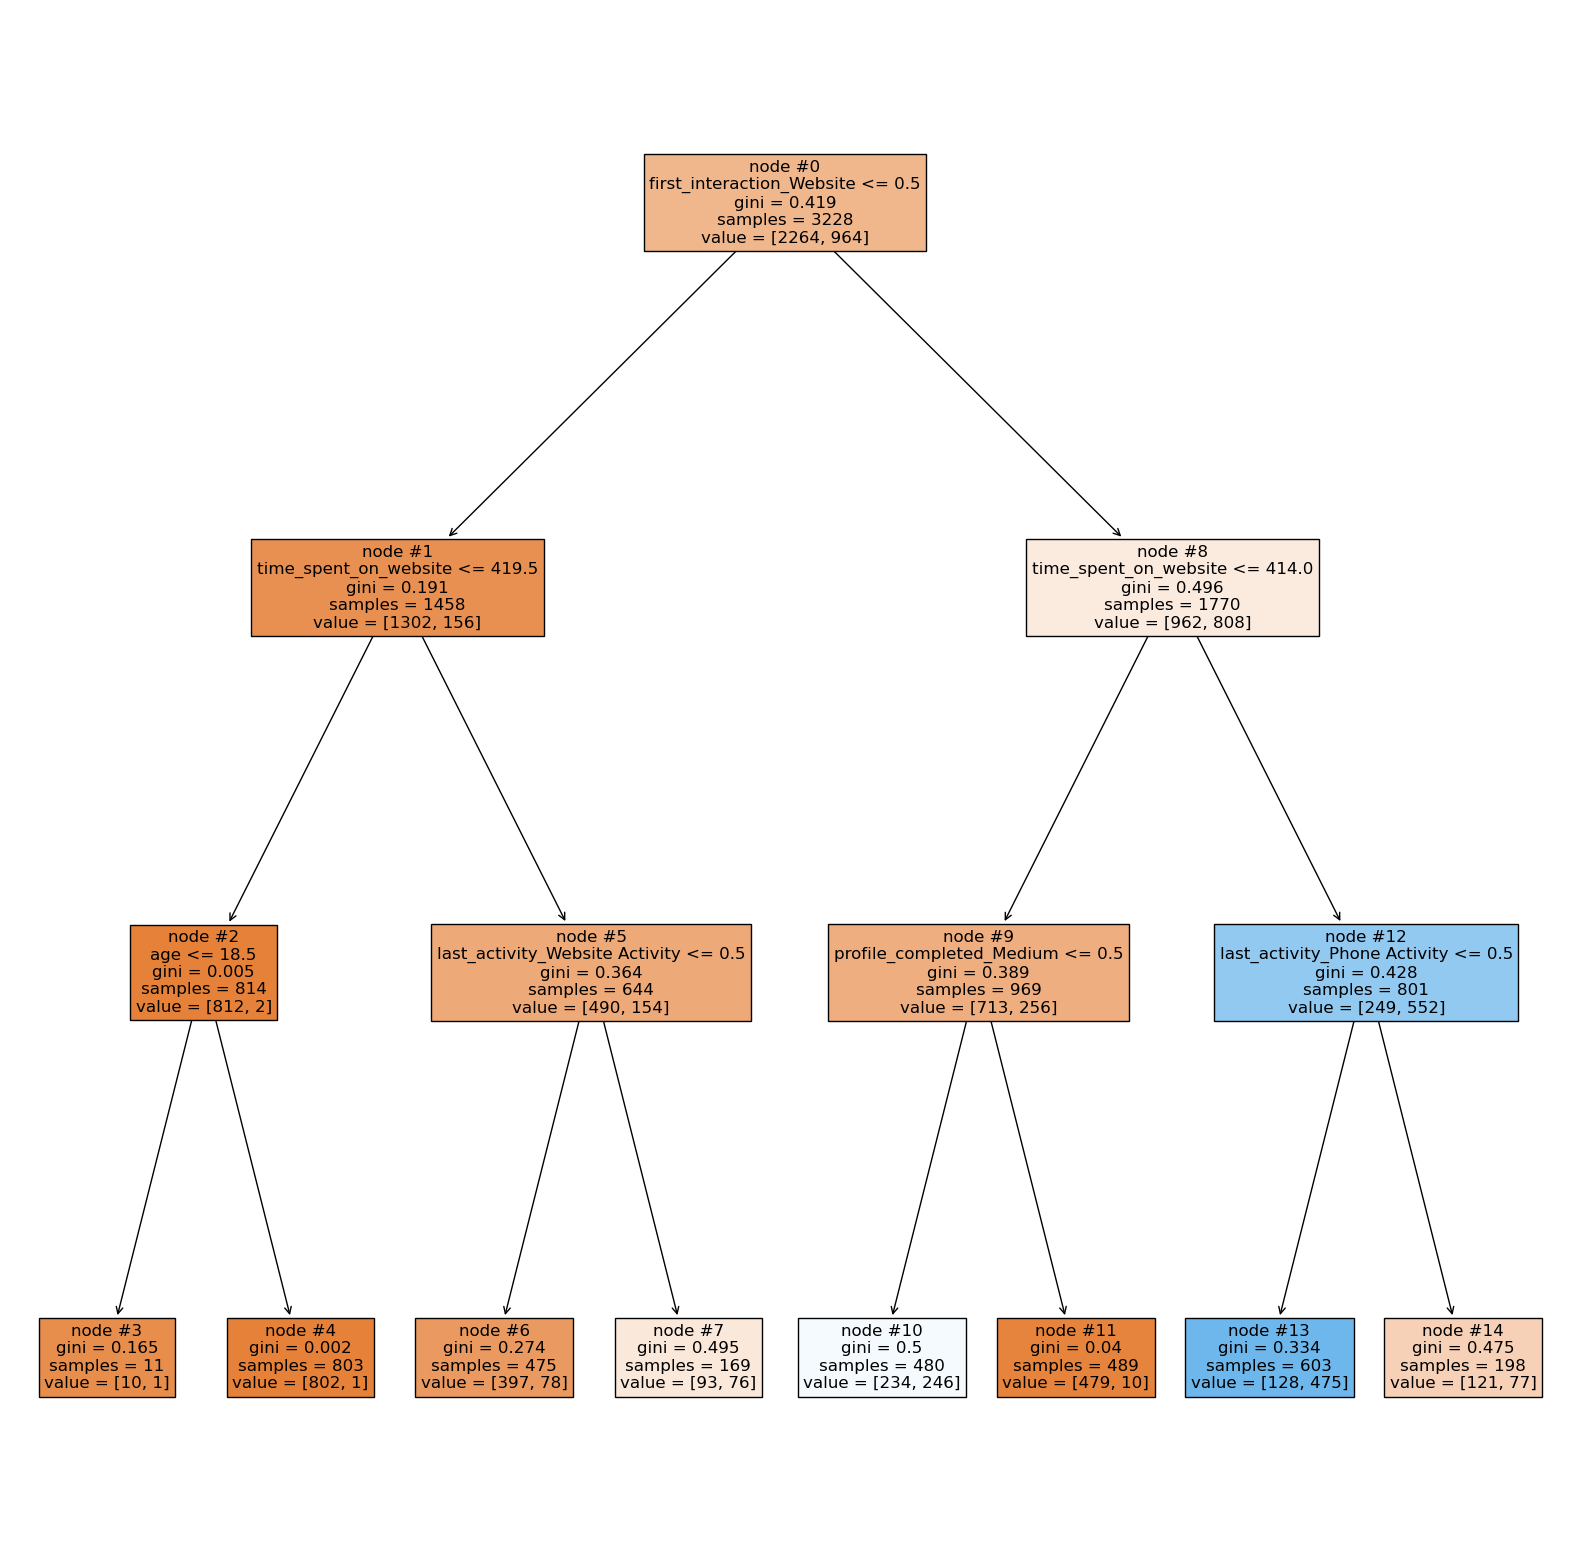

In [50]:
plt.figure(figsize = (20,20))
tree.plot_tree(dt_classifier_depth3, feature_names = features, filled = True, fontsize = 12,
             node_ids = True);

In [51]:
print(tree.export_text(dt_classifier_depth3, feature_names = features, show_weights=True))

|--- first_interaction_Website <= 0.50
|   |--- time_spent_on_website <= 419.50
|   |   |--- age <= 18.50
|   |   |   |--- weights: [10.00, 1.00] class: 0
|   |   |--- age >  18.50
|   |   |   |--- weights: [802.00, 1.00] class: 0
|   |--- time_spent_on_website >  419.50
|   |   |--- last_activity_Website Activity <= 0.50
|   |   |   |--- weights: [397.00, 78.00] class: 0
|   |   |--- last_activity_Website Activity >  0.50
|   |   |   |--- weights: [93.00, 76.00] class: 0
|--- first_interaction_Website >  0.50
|   |--- time_spent_on_website <= 414.00
|   |   |--- profile_completed_Medium <= 0.50
|   |   |   |--- weights: [234.00, 246.00] class: 1
|   |   |--- profile_completed_Medium >  0.50
|   |   |   |--- weights: [479.00, 10.00] class: 0
|   |--- time_spent_on_website >  414.00
|   |   |--- last_activity_Phone Activity <= 0.50
|   |   |   |--- weights: [128.00, 475.00] class: 1
|   |   |--- last_activity_Phone Activity >  0.50
|   |   |   |--- weights: [121.00, 77.00] class: 0



* Depth = 3 did not result in near-pure convert = 1 leaf node, but shows which features are near the top of the tree.
* The decision tree considered **first_interaction = Website** and **time_spent_on_website** to be the most important features.
* **Last_activity ne Phone** was the third feature that then resulted in the highest percentage of converts. (ne = not equal)
* The tree shows some support from EDA where:
   * **First interaction = Website** had over 4x the conversion rate as mobile interaction as shown in EDA
   * **Time spent on website** had the highest correlation of any numeric feature in the heatmap (.30), over 2x the next highest correlation, age (.12)


### Tuning Hyperparameters for Decision Tree:

In [52]:
#tuning hyperparameters 'criterion', 'max_depth' to try to improve results

dt_tuned = DecisionTreeClassifier(random_state=1)
dt_parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1,100,10),
    'max_leaf_nodes':[50,75,150,250],
    'min_samples_split':[10,30,50,70]
}

In [53]:
dt_grid_obj = GridSearchCV(dt_tuned, dt_parameters, scoring = 'recall', cv = 5, n_jobs = -1)
dt_grid_obj = dt_grid_obj.fit(x_train, y_train)

estimator = dt_grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=21, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

* Tuning suggests using criterion = Entropy, a max_depth of 21, max leaf_nodes of 50, and min_samples_split of 10.

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2264
           1       0.82      0.80      0.81       964

    accuracy                           0.89      3228
   macro avg       0.87      0.86      0.86      3228
weighted avg       0.89      0.89      0.89      3228



<Figure size 400x400 with 0 Axes>

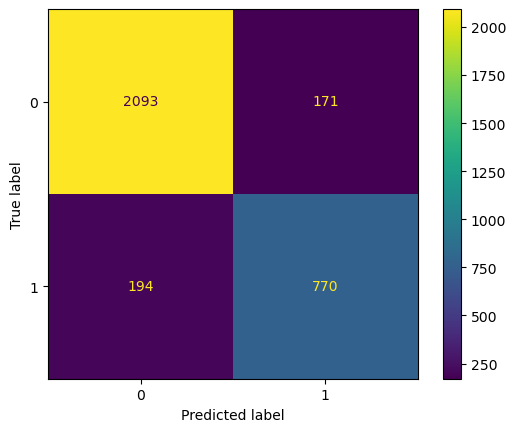

In [54]:
# view metrics on training set tuned dt model
dt_tuned_train = estimator.predict(x_train)
metrics_table(y_train, dt_tuned_train, dt_classifier.classes_)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       971
           1       0.76      0.74      0.75       413

    accuracy                           0.85      1384
   macro avg       0.83      0.82      0.82      1384
weighted avg       0.85      0.85      0.85      1384



<Figure size 400x400 with 0 Axes>

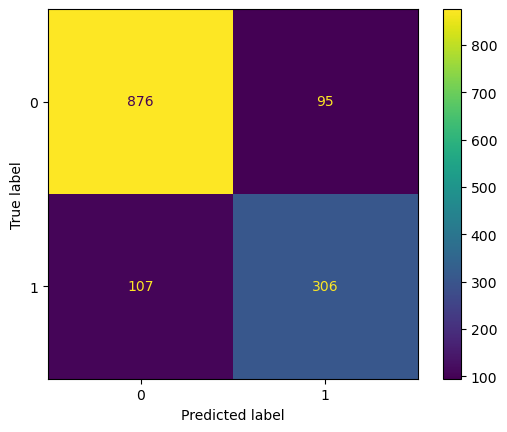

In [55]:
# view metrics on test tuned data
dt_tuned_test = estimator.predict(x_test)
metrics_table(y_test, dt_tuned_test, dt_classifier.classes_)

* Precision and Recall for the convert = 1 test set was only a few points difference from training set.
* This suggests we have somewhat corrected for overfitting using the tuned decision tree model.


#### View feature ranking

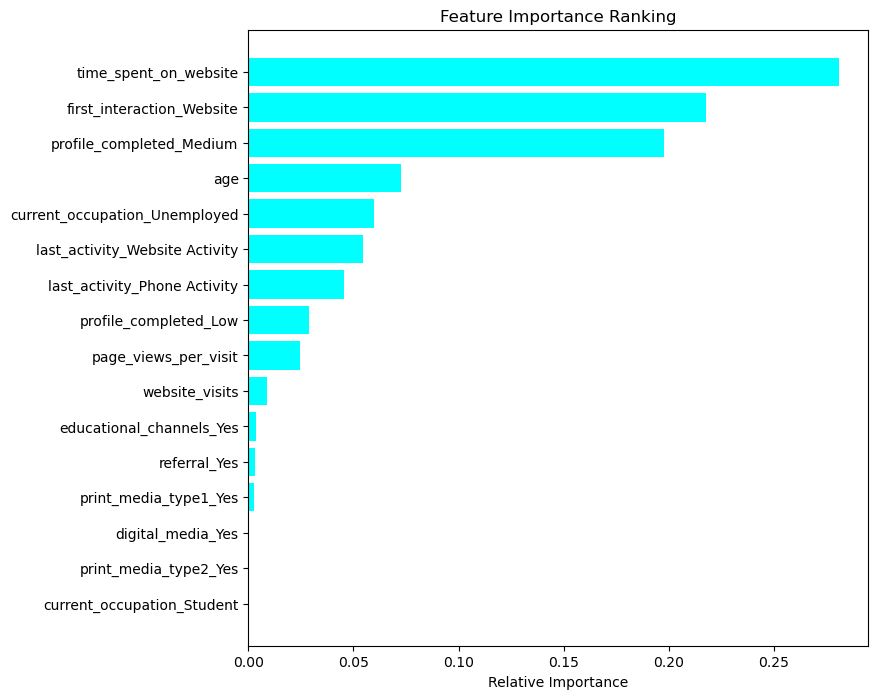

In [56]:
# bar graph of feature importance
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importance Ranking")
plt.barh(range(len(indices)), importances[indices], color="aqua", align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* A ranking of important features shows Time Spent on Website as being the highest, followed by First Interaction being website and then Profile_completed = Medium.

## Building a Random Forest model

In [57]:
#import library
from sklearn.ensemble import RandomForestClassifier 

In [58]:
rf_classifier = RandomForestClassifier(random_state=1)
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



<Figure size 400x400 with 0 Axes>

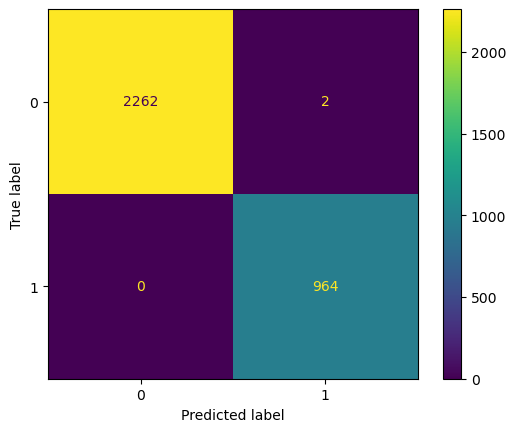

In [59]:
#view performance of training set
rf_train_perf = rf_classifier.predict(x_train)
metrics_table(y_train, rf_train_perf, dt_classifier.classes_)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.78      0.73      0.76       413

    accuracy                           0.86      1384
   macro avg       0.83      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



<Figure size 400x400 with 0 Axes>

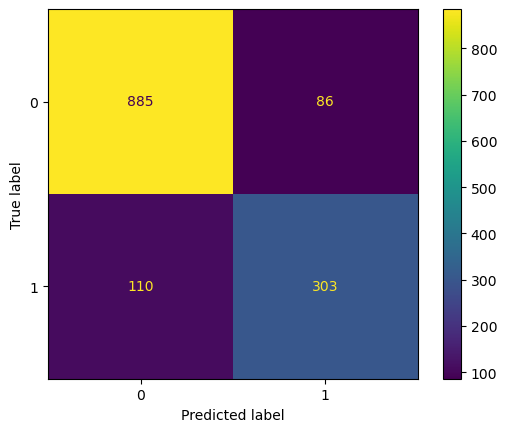

In [60]:
#view performance of test set
rf_test_perf = rf_classifier.predict(x_test)
metrics_table(y_test, rf_test_perf, dt_classifier.classes_)

### Tuning Random Forest

In [61]:
#tuning Random Forest regressor:
rf_tuned = RandomForestClassifier(random_state=1)
rf_hyp_pars = {
    'n_estimators': [100,110,120],
    'max_depth': [None, 5, 7],
    'max_features': [.8, 1.0]    
}

In [62]:
rf_grid_obj = GridSearchCV(rf_tuned, rf_hyp_pars, scoring = 'recall', cv = 5)
rf_grid_obj.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [None, 5, 7], 'max_features': [0.8, 1.0],
                         'n_estimators': [100, 110, 120]},
             scoring='recall')

In [63]:
rf_grid_obj.best_estimator_

RandomForestClassifier(max_depth=5, max_features=0.8, n_estimators=110,
                       random_state=1)

In [64]:
#fit model on rf tuned hyperparameters:
rf_tuned_classifier = rf_grid_obj.best_estimator_
rf_tuned_classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_features=0.8, n_estimators=110,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2264
           1       0.78      0.78      0.78       964

    accuracy                           0.87      3228
   macro avg       0.84      0.84      0.84      3228
weighted avg       0.87      0.87      0.87      3228



<Figure size 400x400 with 0 Axes>

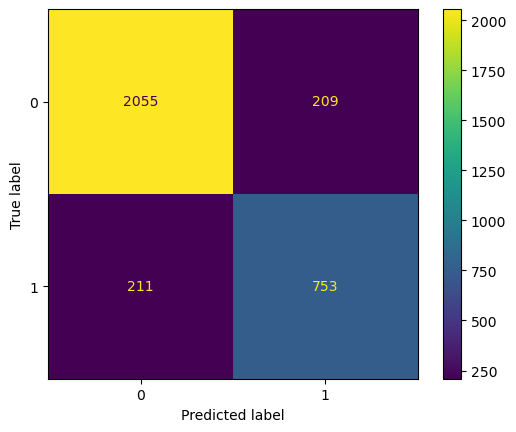

In [65]:
#view rf_tuned performance:
rf_tuned_train_perf = rf_tuned_classifier.predict(x_train)
metrics_table(y_train, rf_tuned_train_perf, dt_classifier.classes_)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       971
           1       0.76      0.75      0.75       413

    accuracy                           0.86      1384
   macro avg       0.83      0.82      0.83      1384
weighted avg       0.85      0.86      0.85      1384



<Figure size 400x400 with 0 Axes>

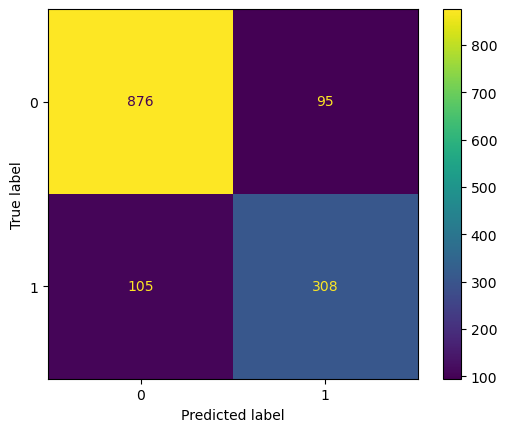

In [66]:
#view rf_tuned test performance:
rf_tuned_test_perf = rf_tuned_classifier.predict(x_test)
metrics_table(y_test, rf_tuned_test_perf, dt_classifier.classes_)

### Observations:
* Tuning the random forest model resulting in a much better match between training and test sets. This model now has good generalization on new features and overfitting has been reduced.
* While ~75% is not excellent for precision and recall of predicting converts, this model is a good step towards generalization. 

## Actionable Insights and Recommendations
### 1. Profile
Using the decision tree, we find that **first_interaction: Website**, **time_spent_on_website**, and **profile_completed** most characterized the target variable convert or non-convert. 

### 2. Insights
The goal of this project is to minimize false negatives -- that leads most likely to be customers were not missed in recruiting efforts. Minimizing these false negatives is apparent in the evaluation metric of 'recall'. Our results ended up with lower recalls for 1 (converts) than 0 (non-converts).
Exploratory Data Analysis summary:
1. From EDA, leads are more likely to be professional. Professionals may have differing motivations than students. For example, professionals may value new skill sets as they are already established in their current positions. Their current position may be a roadblock to further advancement unless they add to their current skill set. A student on the other hand, already has a full load of newly acquired skills that they are using to usually land a first job.\
2. Referred leads were also more likely to convert to customers.
There was little distinction between ad type and occupation. There was a slight uptick in newspaper exposure for students, and digital media and magazines for professionals, but the differences were minimal.\
An hypothesis that did not hold was that mobile app users tended to be younger. EDA showed that the mobile/website split was fairly even among occupations, with students using the app at only a slightly higher rate than professionals (57% vs 54%).



### 3. Recommendations
**Referral** to ExtraaLearn had a higher conversion rate than non-referred leads. This could be due to trust in people that leads know. Trusted colleagues provide better confidence that the program is worth taking. A recommendation is to continue the referral program but perhaps make it more enticing. Offer incentives for referrals that would benefit referers after they have finished the class. For example, cash incentives could be on a sliding scale depending on number of referrals and/or course completions. Referers could be afforded exclusive access to job recruitment events or job search assitance platforms. ExtraaLearn could look for ways to partner with others companies to provide additional perks for referrals. </font>

As most converts tended to be **professional**, perhaps enhance program offerings for them. During the course, perhaps offer opportunities for them to upload data from their current positions to practice real-world feature engineering and data cleaning.

For **unemployed** professionals, free content could potentially be offered. This free content could include something as simple as curated reference sources. This might maintain engagement until such time the person can afford to convert.
    
To increase **student** enrollment, focus on marketing ExtraaLearn as a supplemental course that would not take much time out of their current studies. Focus on highlighting the additional skill set that they might not be getting from current coursework. In addition, a student section could be longer than the current session, allowing for smaller chunks to be tackled each week to better integrate with their current courseload. 
    
**Not phone** vs phone were more likely to be converts. ExtraaLearn might learn ways to improve phone communications. Avoid disingenuous tactics when interviewing; suggesting that leads have "great credentials" or are "hightly qualified" could sound fishy or "scam-like" and lacking credibility. Rather, during the **phone** interview focus on highlighting course features that the lead found interesting, perhaps using a new variable called **pages_visited** to discover what most attracted a lead.

ExtraaLearn could improve its mobile app experience to perhaps engage more leads and potential converts. 

In summary, ExtraaLearn might seek to improve its phone contact conversion rate by including a pages_visited data feature to learn what attracted the lead and expand upon that during conversation. An enhanced referral perks program could perhaps create an uptick in referrals. ExtraaLearn could continue to use course feedback to improve its offerings. Feedback regarding user technology experience, course load and length, instructors, and other constructive criticism could be used for making further improvements. As the onlearn learning landscape continues to grow at an exponential rate, ExtraaLearn could continue to look for novel and unique ways to change and improve for a new generation of learners.</font>